<a href="https://colab.research.google.com/github/DanteAgarwal/meta_heuristics_optimzation_algorithm/blob/main/GWO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import time

import matplotlib.pyplot as plt
import numpy as np


def GWO(objf, lb, ub, dim, SearchAgents_no, Max_iter):
    # Max_iter=1000
    # lb=-100
    # ub=100
    # dim=30
    # SearchAgents_no=5
    # initialize alpha, beta, and delta_pos
    Alpha_pos = np.zeros(dim)
    Alpha_score = float("inf")

    Beta_pos = np.zeros(dim)
    Beta_score = float("inf")

    Delta_pos = np.zeros(dim)
    Delta_score = float("inf")

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    # Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    for i in range(dim):
        Positions[:, i] = np.random.uniform(0, 1, SearchAgents_no) * (ub[i] - lb[i]) + lb[i]

    Convergence_curve = np.zeros(Max_iter)

    # Loop counter
    print("GWO is optimizing  \"" + objf.__name__ + "\"")

    timerStart = time.time()
    # Main loop
    for l in range(0, Max_iter):
        for i in range(0, SearchAgents_no):

            # Return back the search agents that go beyond the boundaries of the search space
            for j in range(dim):
                Positions[i, j] = np.clip(Positions[i, j], lb[j], ub[j])

            # Calculate objective function for each search agent
            fitness = objf(Positions[i, :])

            # Update Alpha, Beta, and Delta
            if fitness < Alpha_score:
                Alpha_score = fitness;  # Update alpha
                Alpha_pos = Positions[i, :].copy()

            if (fitness > Alpha_score and fitness < Beta_score):
                Beta_score = fitness  # Update beta
                Beta_pos = Positions[i, :].copy()

            if (fitness > Alpha_score and fitness > Beta_score and fitness < Delta_score):
                Delta_score = fitness  # Update delta
                Delta_pos = Positions[i, :].copy()

        a = 2 - l * ((2) / Max_iter);  # a decreases linearly from 2 to 0

        # Update the Position of search agents including omegas
        for i in range(0, SearchAgents_no):
            for j in range(0, dim):
                r1 = random.random()  # r1 is a random number in [0,1]
                r2 = random.random()  # r2 is a random number in [0,1]

                A1 = 2 * a * r1 - a;  # Equation (3.3)
                C1 = 2 * r2;  # Equation (3.4)

                D_alpha = abs(C1 * Alpha_pos[j] - Positions[i, j]);  # Equation (3.5)-part 1
                X1 = Alpha_pos[j] - A1 * D_alpha;  # Equation (3.6)-part 1

                r1 = random.random()
                r2 = random.random()

                A2 = 2 * a * r1 - a;  # Equation (3.3)
                C2 = 2 * r2;  # Equation (3.4)

                D_beta = abs(C2 * Beta_pos[j] - Positions[i, j]);  # Equation (3.5)-part 2
                X2 = Beta_pos[j] - A2 * D_beta;  # Equation (3.6)-part 2

                r1 = random.random()
                r2 = random.random()

                A3 = 2 * a * r1 - a;  # Equation (3.3)
                C3 = 2 * r2;  # Equation (3.4)

                D_delta = abs(C3 * Delta_pos[j] - Positions[i, j]);  # Equation (3.5)-part 3
                X3 = Delta_pos[j] - A3 * D_delta;  # Equation (3.5)-part 3

                Positions[i, j] = (X1 + X2 + X3) / 3  # Equation (3.7)

        Convergence_curve[l] = Alpha_score;

        if (l % 1 == 0):
            print(['At iteration ' + str(l) + ' the best fitness is ' + str(Alpha_score)])

    x = np.arange(0, Max_iter, dtype=int) + 1
    timerEnd = time.time()
    print('Completed in', (timerEnd - timerStart))
    fire = (timerEnd - timerStart)
    plt.plot(x, Convergence_curve, 'o-')
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    plt.title(
        f"Convergence_curve for GWO for parameter including population "
        f"{SearchAgents_no}, \niteration {Max_iter},and  max fitness is:{min(Convergence_curve)}")
    plt.show()

    opts ={"p":Alpha_pos,'c':min(Convergence_curve),"ti":fire}

    return opts

GWO is optimizing  "fitness_function"
['At iteration 0 the best fitness is 0.5371409749670619']
['At iteration 1 the best fitness is 0.5170409300844083']
['At iteration 2 the best fitness is 0.5170409300844083']
['At iteration 3 the best fitness is 0.5170409300844083']
['At iteration 4 the best fitness is 0.5098584428715874']
Completed in 11.427290916442871


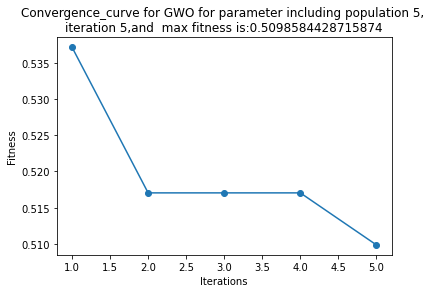

[  3   4   7   8  10  13  15  20  21  23  24  25  31  32  35  36  40  44
  48  49  50  52  54  57  59  60  62  64  66  69  71  72  75  76  77  79
  84  97 100 107 108 110 111 115 117 118 119 120 121 122 125 127 132 133
 137 140 141 142 148 150 151 154 155 156 158 159 160 161 162 171 174 177
 179 181 183 184 188 190 192 193 197 199 200 207 208 209]


'\nfor i in range(15, 25, 5):\n    col = []\n    print(f"at poulation of {i}")\n    for j in range(100, 600, 100):\n        print(f" at iteration of {j}")\n        row = []\n        data = GWO(fitness_function, 0, 1, num_features, i, j)\n        fit, cost, timefire = data[\'p\'], data[\'c\'], data[\'ti\']\n        selected_features = np.where(fit > 0.5)[0]\n        # selected_features = [9,13,14,39]\n        print(selected_features)\n        for o in range(1):\n            row=[]\n            row.append(213)\n            row.append(j)\n            row.append(i)\n            row.append(selected_features)\n            row.append(cost)\n            row.append(len(selected_features))\n            row.append(timefire)\n        print(row)\n        col.append(row)\n        if j== 500:\n            head = ["No. of features", "No. of iteration", "Population size", "Features Selected", "fitness value",\n                    "Features number", "Time of exceution"]\n            print(tabulate(col, 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate


num_features = 213


def fitness_function(positions):
    features = np.where(positions >= 0.4999)[0]
    # print('selected_features:', features)

    # print(train_df.head())
    data = pd.read_csv('/content/drive/MyDrive/final_csv.csv')
    train_data, test_data = train_test_split(data)
    train_x, test_x, train_y, test_y = train_data.iloc[:, :num_features], test_data.iloc[:,
                                                                          :num_features], train_data.iloc[
                                                                                          :,
                                                                                          -1], test_data.iloc[
                                                                                               :, -1]

    train_xf = train_x.iloc[:, features]
    test_xf = test_x.iloc[:, features]

    knn_classifier = KNeighborsClassifier(n_neighbors=7)
    # knn_classifier = svm.SVC()
    # knn_classifier  = xgb.XGBClassifier(n_estimators=200, max_depth=9, learning_rate=0.1)
    # knn_classifier  =RandomForestClassifier(n_estimators=100, n_jobs=14)
    knn_classifier.fit(train_xf, train_y)

    accuracy = knn_classifier.score(test_xf, test_y)

    # print('Accuracy:', accuracy)

    w = 0.9

    return w * accuracy + (1 - w) * 1 / (len(features))

data = GWO(fitness_function, 0, 1, num_features, 5, 5)
fit, cost, timefire = data['p'], data['c'], data['ti']
selected_features = np.where(fit > 0.5)[0]
        # selected_features = [9,13,14,39]
print(selected_features)
# Load the data
"""
for i in range(15, 25, 5):
    col = []
    print(f"at poulation of {i}")
    for j in range(100, 600, 100):
        print(f" at iteration of {j}")
        row = []
        data = GWO(fitness_function, 0, 1, num_features, i, j)
        fit, cost, timefire = data['p'], data['c'], data['ti']
        selected_features = np.where(fit > 0.5)[0]
        # selected_features = [9,13,14,39]
        print(selected_features)
        for o in range(1):
            row=[]
            row.append(213)
            row.append(j)
            row.append(i)
            row.append(selected_features)
            row.append(cost)
            row.append(len(selected_features))
            row.append(timefire)
        print(row)
        col.append(row)
        if j== 500:
            head = ["No. of features", "No. of iteration", "Population size", "Features Selected", "fitness value",
                    "Features number", "Time of exceution"]
            print(tabulate(col, headers=head, tablefmt="fancy_grid"))
"""

In [ ]:
train_x = train_x.iloc[:, selected_features]
test_x = test_x.iloc[:, selected_features]

In [ ]:
from sklearn.metrics import f1_score
import time
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate
from sklearn.metrics import classification_report

In [ ]:
num_features = 213
selected_features = []
selected_features =  [int(x) for x in input().split(",")]
print(selected_features)
data_df = pd.read_excel('/content/featurestranspose.xlsx')
data_df.drop('sno.', inplace=True, axis=1)
train_data, test_data = train_test_split(data_df)
train_x, test_x, train_y, test_y = train_data.iloc[:, :num_features], test_data.iloc[:, :num_features], train_data.iloc[:, -1], test_data.iloc[:, -1]
train_x = train_x.iloc[:, selected_features]
test_x = test_x.iloc[:, selected_features]

3, 4, 6, 7, 10, 11, 12, 13, 14, 16, 17
[3, 4, 6, 7, 10, 11, 12, 13, 14, 16, 17]


In [ ]:
rf_classifier =Pipeline([('s',StandardScaler() ),('t',MinMaxScaler()),
                               ('m',RandomForestClassifier(n_estimators=100, n_jobs=20))])
rf_classifier.fit(train_x, train_y)


predictedrfp = rf_classifier.predict_proba(test_x)[:, 1]
predictedrf = rf_classifier.predict(test_x)
print(confusion_matrix(test_y, predictedrf))
print(accuracy_score(test_y, predictedrf))
tn, fp, fn, tp = confusion_matrix(test_y,predictedrf).ravel()
specificityrf = tn / (tn+fp)
kapparf=cohen_kappa_score(predictedrf,test_y,weights='quadratic')
MCCrf = matthews_corrcoef(test_y, predictedrf)
semsrf =  (tp)/(tp + fn)
prerf = tp / (tp + fp)
accrf= accuracy_score(test_y, predictedrf)
f1rf = f1_score(test_y,predictedrf,average='weighted')
print(f"sensitivity:{semsrf} \n precision:{prerf} \n F1-score:{f1rf}")
print(f"MCC:{MCCrf} \n kappa score:{kapparf} \n specificity:{specificityrf}")
print(classification_report(test_y, predictedrf))

[[19  1]
 [ 1 14]]
0.9428571428571428
sensitivity:0.9333333333333333 
 precision:0.9333333333333333 
 F1-score:0.9428571428571428
MCC:0.8833333333333333 
 kappa score:0.8833333333333333 
 specificity:0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.93      0.93      0.93        15

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35



In [ ]:
knn_classifier =Pipeline([('s',StandardScaler() ),('t',MinMaxScaler()),
                               ('m',KNeighborsClassifier(n_neighbors=50))])
knn_classifier.fit(train_x, train_y)

predictedp= knn_classifier.predict_proba(test_x)[:, 1]
predicted = knn_classifier.predict(test_x)
print(confusion_matrix(test_y, predicted))
print(accuracy_score(test_y, predicted))
tn, fp, fn, tp = confusion_matrix(test_y,predicted).ravel()
specificitykn = tn / (tn+fp)
kappakn=cohen_kappa_score(predicted,test_y,weights='quadratic')
MCCkn = matthews_corrcoef(test_y, predicted)
semskn =  (tp)/(tp + fn)
prekn = tp / (tp + fp)
acckn= accuracy_score(test_y, predicted)
f1kn = f1_score(test_y,predicted,average='weighted')
print(f"sensitivity:{semskn} \n precision:{prekn} \n F1-score:{f1kn}")
print(f"MCC:{MCCkn} \n kappa score:{kappakn} \n specificity:{specificitykn}")
print(classification_report(test_y, predicted))

[[18  2]
 [ 2 13]]
0.8857142857142857
sensitivity:0.8666666666666667 
 precision:0.8666666666666667 
 F1-score:0.8857142857142857
MCC:0.7666666666666667 
 kappa score:0.7666666666666666 
 specificity:0.9
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.87      0.87      0.87        15

    accuracy                           0.89        35
   macro avg       0.88      0.88      0.88        35
weighted avg       0.89      0.89      0.89        35



In [ ]:
#svm_classifier =Pipeline([('s',StandardScaler() ),('t',MinMaxScaler()),
#                               ('m',svm.SVC(kernel='rbf',random_state=0, tol=1e-5))])
#svm_classifier.fit(train_x, train_y)

from sklearn.ensemble import BaggingClassifier
svm =Pipeline([('s',StandardScaler() ),('t',MinMaxScaler()),
                             ('m',SVC(kernel='linear',random_state=500, tol=1e-5))])
svm_classifier = BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=500)
svm_classifier.fit(train_x, train_y)
predictedsvm = svm_classifier.predict(test_x)
print(confusion_matrix(test_y, predictedsvm))
print(accuracy_score(test_y, predictedsvm))
tn, fp, fn, tp = confusion_matrix(test_y,predictedsvm).ravel()
specificitysvm = tn / (tn+fp)
kappasvm=cohen_kappa_score(predictedsvm,test_y,weights='quadratic')
MCCsvm = matthews_corrcoef(test_y, predictedsvm)
semssvm =  (tp)/(tp + fn)
presvm = tp / (tp + fp)
accsvm= accuracy_score(test_y, predictedsvm)
f1svm = f1_score(test_y,predictedsvm,average='weighted')
print(f"sensitivity:{semssvm} \n precision:{presvm} \n F1-score:{f1svm}")
print(f"MCC:{MCCsvm} \n kappa score:{kappasvm} \n specificity:{specificitysvm}")
print(classification_report(test_y, predictedsvm))

[[17  3]
 [ 1 14]]
0.8857142857142857
sensitivity:0.9333333333333333 
 precision:0.8235294117647058 
 F1-score:0.8862781954887217
MCC:0.7756155753317282 
 kappa score:0.7704918032786885 
 specificity:0.85
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.82      0.93      0.87        15

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35



In [ ]:
xgb_classifier =Pipeline([('s',StandardScaler() ),('t',MinMaxScaler()),
                               ('m',xgb.XGBClassifier(n_estimators=200, max_depth=150, learning_rate=0.1))])
xgb_classifier.fit(train_x, train_y)

predictedxgbp = xgb_classifier.predict_proba(test_x)[:, 1]
predictedxgb = xgb_classifier.predict(test_x)
print(confusion_matrix(test_y, predictedxgb))
print(accuracy_score(test_y, predictedxgb))
tn, fp, fn, tp = confusion_matrix(test_y,predictedxgb).ravel()
specificityxg = tn / (tn+fp)
kappaxg=cohen_kappa_score(predictedxgb,test_y,weights='quadratic')
MCCxg = matthews_corrcoef(test_y, predictedxgb)
semsxg =  (tp)/(tp + fn)
prexg = tp / (tp + fp)
accxg= accuracy_score(test_y, predictedxgb)
f1xg = f1_score(test_y,predictedxgb,average='weighted')
print(f"sensitivity:{semsxg} \n precision:{prexg} \n F1-score:{f1xg}")
print(f"MCC:{MCCxg} \n kappa score:{kappaxg} \n specificity:{specificityxg}")
print(classification_report(test_y, predictedxgb))

[[18  2]
 [ 0 15]]
0.9428571428571428
sensitivity:1.0 
 precision:0.8823529411764706 
 F1-score:0.9431390977443609
MCC:0.8911327886790068 
 kappa score:0.8852459016393442 
 specificity:0.9
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.88      1.00      0.94        15

    accuracy                           0.94        35
   macro avg       0.94      0.95      0.94        35
weighted avg       0.95      0.94      0.94        35



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
estimators = [('rf', RandomForestClassifier(n_estimators=100, n_jobs=50)),
              ('svm', make_pipeline(StandardScaler(),MinMaxScaler(),SVC(kernel='linear',random_state=50, tol=1e-5)))]
clf = StackingClassifier(estimators=estimators,
                         final_estimator=xgb.XGBClassifier(n_estimators=100, max_depth=50, learning_rate=0.1))
#clf = BaggingClassifier(base_estimator=clf, n_estimators=100, random_state=500)
clf.fit(train_x, train_y)
predictedenp = clf.predict_proba(test_x)[:, 1]
predicteden = clf.predict(test_x)
print(confusion_matrix(test_y, predicteden))
print(accuracy_score(test_y, predicteden))
tn, fp, fn, tp = confusion_matrix(test_y,predicteden).ravel()
specificityen = tn / (tn+fp)
kappaen=cohen_kappa_score(predicteden,test_y,weights='quadratic')
MCCen = matthews_corrcoef(test_y, predicteden)
semsen =  (tp)/(tp + fn)
preen = tp / (tp + fp)
accen= accuracy_score(test_y, predicteden)
f1en = f1_score(test_y,predicteden,average='weighted')
print(f"sensitivity:{semsen} \n precision:{preen} \n F1-score:{f1en}")
print(f"MCC:{MCCen} \n kappa score:{kappaen} \n specificity:{specificityen}")
print(classification_report(test_y, predicteden))


[[18  2]
 [ 1 14]]
0.9142857142857143
sensitivity:0.9333333333333333 
 precision:0.875 
 F1-score:0.914569301666076
MCC:0.8278327231656525 
 kappa score:0.8264462809917356 
 specificity:0.9
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.88      0.93      0.90        15

    accuracy                           0.91        35
   macro avg       0.91      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35



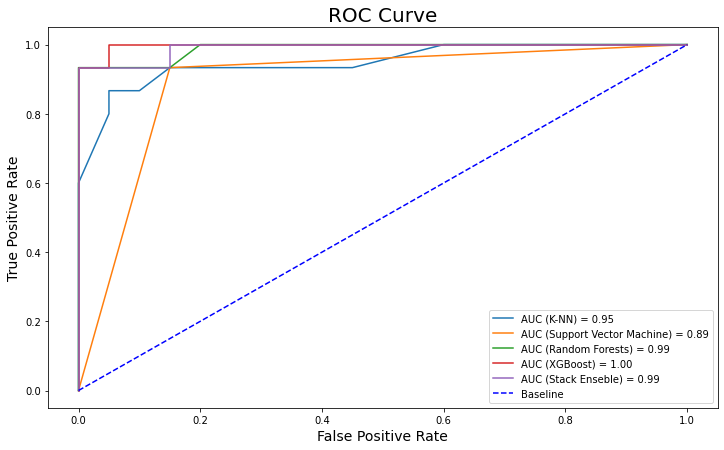

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


auc_knn = roc_auc_score(test_y, predictedp)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_y, predictedp)

auc_svm = roc_auc_score(test_y, predictedsvm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(test_y, predictedsvm)

auc_rf = roc_auc_score(test_y, predictedrfp)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, predictedrfp)

auc_xg = roc_auc_score(test_y, predictedxgbp)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(test_y, predictedxgbp)

auc_en = roc_auc_score(test_y, predictedenp)
fpr_en, tpr_en, thresholds_en = roc_curve(test_y, predictedenp)


plt.figure(figsize=(12, 7))
plt.plot(fpr_knn, tpr_knn, label=f'AUC (K-NN) = {auc_knn:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (Support Vector Machine) = {auc_svm:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot(fpr_en, tpr_en, label=f'AUC (Stack Enseble) = {auc_en:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [ ]:
from tabulate import tabulate

knn ="KNN"
en= "Stack Enseble "
# assign data
mydata = [["Random Forest", specificityrf, semsrf, kapparf, prerf, f1rf, MCCrf, accrf, auc_rf],
          ["KNN", specificitykn, semskn, kappakn, prekn, f1kn, MCCkn, acckn, auc_knn],
          ["SVM", specificitysvm, semssvm, kappasvm, presvm, f1svm, MCCsvm, accsvm, auc_svm],
          ["XGBoost", specificityxg, semsxg, kappaxg, prexg, f1xg, MCCxg, accxg, auc_xg],
          ["Stack Ensemble ", specificityen, semsen, kappaen, preen, f1en, MCCen, accen, auc_en]]

# create header
head = ["name","specificity","specificity","kappa score","precision","F1-score","MCC","Accuracy","auc"]

# display table
print(tabulate(mydata, headers=head, tablefmt="fancy_grid"))

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═════════════╤════════════╤══════════╤════════════╤══════════╕
│ name           │   specificity │   specificity │   kappa score │   precision │   F1-score │      MCC │   Accuracy │      auc │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═════════════╪════════════╪══════════╪════════════╪══════════╡
│ Random Forest  │          0.95 │      0.933333 │      0.883333 │    0.933333 │   0.942857 │ 0.883333 │   0.942857 │ 0.988333 │
├────────────────┼───────────────┼───────────────┼───────────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│ KNN            │          0.9  │      0.866667 │      0.766667 │    0.866667 │   0.885714 │ 0.766667 │   0.885714 │ 0.948333 │
├────────────────┼───────────────┼───────────────┼───────────────┼─────────────┼────────────┼──────────┼────────────┼──────────┤
│ SVM            │          0.85 │      0.933333 │      0.770492 │    0.823529 │   0.886278 │ 0.7